# Feature Engineering. Практическая работа

Сдаётся на проверку.

## Цели практической работы
1. Потренироваться генерировать дополнительные признаки с помощью lambda-функций.
2. Потренироваться генерировать дополнительные строковые признаки.
3. Познакомиться с обработкой данных с помощью библиотеки Scikit-learn.
4. Научиться нормализовывать количественные признаки.
5. Научиться применять кодирование категориальных переменных.
6. Научиться выделять признаки из временнЫх переменных.
7. Подготовить датасет к этапу моделирования.

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Сгенерировать дополнительные признаки для этапа моделирования, используя lambda-функции и функции над строками.
3. Нормализовать количественные признаки.
4. Применить кодирование категориальных переменных.
5. Выделить признаки из временнЫх переменных.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите генерировать дополнительные признаки и завершите подготовку датасета для этапа моделирования.

## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL-записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Задача 1. Построение признаков из строк

1. Загрузите датасет из `data/vehicles_dataset_upd6.csv`, выведите первые 5 записей и список колонок.

In [2]:
# Загружаем данные
df = pd.read_csv('data/vehicles_dataset_upd6.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,is_jeep,is_honda,is_nissan,x0_diesel,x0_electric,x0_gas,x0_hybrid,x0_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0,0,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0,0,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


In [3]:
df.shape

(9619, 45)

2. Выведите список значений и количество уникальных значений для модели автомобиля.

In [4]:
# Kоличество уникальных значений для модели автомобиля
df.model.unique().shape

(3341,)

In [5]:
# Список значений и количество уникальных значений для модели автомобиля
df.model.value_counts()

f-150                        145
other                        107
silverado 1500               105
1500                          99
camry                         76
                            ... 
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
silverado 1500 ls              1
a3 2.0t premium plus pzev      1
Name: model, Length: 3341, dtype: int64

3. Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак `short_model`, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [6]:
# Ваш код здесь
df['short_model'] = df.model.apply(lambda x: x.lower().split(' ')[0])

In [7]:
df.short_model.unique().shape

(906,)

In [8]:
df.short_model.value_counts()

silverado     392
1500          205
wrangler      204
grand         202
f-150         197
             ... 
xj8             1
mitusbishi      1
gl450           1
sierra1500      1
gs350           1
Name: short_model, Length: 906, dtype: int64

### Задача 2. Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатайте наименование категории и количество уникальных значений в ней.


In [9]:
# Сохраним категориальные переменные short_model, transmission, region, manufacturer, state, title_status, age_category в отдельный список
columns_categorical = ['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
# Наименование категории и количество уникальных значений в ней.
for col in columns_categorical:
    print(col, df[col].unique().shape[0])

short_model 906
transmission 3
region 393
manufacturer 40
state 51
title_status 6
age_category 3


2. Создайте датафрейм `data`, содержащий только выбранные категориальные переменные.

In [10]:
# Создаем новый датафрейм data, содержащий только выбранные категориальные переменные
data = df[columns_categorical]
data.tail()

,short_model,transmission,region,manufacturer,state,title_status,age_category
9614,rav4,automatic,chautauqua,toyota,ny,clean,old
9615,wrangler,other,binghamton,jeep,ny,clean,average
9616,a3,automatic,salem,audi,or,clean,average
9617,cayenne,automatic,madison,porsche,wi,clean,new
9618,1500,other,norfolk / hampton roads,ram,va,clean,new


In [11]:
data.shape

(9619, 7)

3. Создайте объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.

In [12]:
# Создаем объект класса OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

4. Идентифицируйте параметры преобразования на датафрейме с категориальными переменными.

In [13]:
# Идентифицируем параметры преобразования
ohe.fit(df[columns_categorical])

OneHotEncoder(sparse=False)

5. Примените преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [14]:
# Применим преобразование для датафрейма с категориальными переменными и сохраним в новую переменную
ohe_data = ohe.transform(df[columns_categorical])
ohe_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
ohe_data.shape

(9619, 1402)

6. Выведите новые наименования признаков с помощью метода `get_feature_names_out`.

In [135]:
# Получим новые наименования признаков с помощью метода get_feature_names_out.
ohe.get_feature_names_out()

array(['short_model_-benz', 'short_model_1', 'short_model_124', ...,
       'age_category_average', 'age_category_new', 'age_category_old'],
      dtype=object)

7. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые 5 записей датафрейма и список колонок.

In [138]:
# Добавим в исходный датафрейм получившиеся новые признаки
df[ohe.get_feature_names()] = ohe_data
df.head()

D:\Users\garri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,model_len_std,model_word_count_std,lat_mm,long_mm,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.163032,1.910669,0.341769,0.288699,4,5,1,-0.615846,1.120284,-1.322394
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.932087,1.235799,0.468665,0.333055,5,0,5,1.623784,-1.374972,-0.695973
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.470197,0.560930,0.313561,0.292022,4,2,4,-0.615846,-0.376870,-0.852578
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.915473,-0.788810,0.356215,0.314844,4,5,8,-0.615846,1.120284,-0.226157
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,1.163032,1.910669,0.361810,0.293893,4,3,9,-0.615846,0.122182,-0.069552


8. Посмотрите на результат обратного преобразования получившейся матрицы в исходные признаки, используйте `inverse_transform`.

In [18]:
# Выведем результат обратного преобразования получившейся матрицы в исходные признаки, используем inverse_transform
ohe.inverse_transform(ohe_data)

array([['2500', 'other', 'chattanooga', ..., 'tn', 'clean', 'new'],
       ['explorer', 'automatic', 'north jersey', ..., 'nj', 'clean',
        'new'],
       ['golf', 'other', 'reno / tahoe', ..., 'ca', 'clean', 'new'],
       ...,
       ['a3', 'automatic', 'salem', ..., 'or', 'clean', 'average'],
       ['cayenne', 'automatic', 'madison', ..., 'wi', 'clean', 'new'],
       ['1500', 'other', 'norfolk / hampton roads', ..., 'va', 'clean',
        'new']], dtype=object)

### Задача 3. Стандартизация данных

1. Создайте переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создайте датафрейм `data`, содержащий только выбранные количественные переменные.


In [19]:
# Создаем новый лист с количественными переменными lat, long, year, odometer/price, desc_len, model_in_desc, model_len, model_word_count
columns_quantitative = ['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
# Создаем новый датафрейм data, содержащий только выбранные переменные
data = df[columns_quantitative]
data.tail()

,lat,long,year,odometer/price,desc_len,model_in_desc,model_len,model_word_count
9614,42.123900,-79.189500,2002,33.370412,1710,0,4,1
9615,43.216990,-77.755610,2008,7.835323,948,0,8,1
9616,44.925908,-122.982753,2011,16.696387,909,0,25,5
9617,43.029559,-89.397796,2015,1.941787,3644,0,7,1
9618,36.670000,-76.300000,2017,1.122882,4483,0,22,5


2. Создайте объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

In [20]:
# Создайем объект std_scaler класса StandardScaler с параметрами по умолчанию
std_scaler = StandardScaler()
std_scaler

StandardScaler()

3. Идентифицируйте параметры преобразования на датафрейме с количественными переменными.

In [21]:
# Идентифицируем параметры преобразования
std_scaler.fit(df[columns_quantitative])

StandardScaler()

4. Примените преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [22]:
# Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную
std_scaler_data = std_scaler.transform(df[columns_quantitative])
std_scaler_data

array([[-0.61917248,  0.48424452,  1.32239376, ..., -0.15578836,
         1.16303238,  1.91066901],
       [ 0.38801429,  1.11079989,  0.69597272, ..., -0.15578836,
         0.93208734,  1.23579936],
       [-0.84305905,  0.531185  ,  0.85257798, ..., -0.15578836,
         0.47019727,  0.56092971],
       ...,
       [ 1.10542805, -1.62887477, -0.08705357, ..., -0.15578836,
         1.50944993,  1.91066901],
       [ 0.7739386 ,  0.25195859,  0.53936746, ..., -0.15578836,
        -0.56905538, -0.78880959],
       [-0.33773799,  0.98546471,  0.85257798, ..., -0.15578836,
         1.16303238,  1.91066901]])

In [23]:
# Получим новые наименования признаков с помощью метода get_feature_names_out.
std_scaler.get_feature_names_out()

array(['lat', 'long', 'year', 'odometer/price', 'desc_len',
       'model_in_desc', 'model_len', 'model_word_count'], dtype=object)

5. Создайте наименования новых признаков по шаблону: `lat_std` для `lat` и так далее.

In [24]:
# Создаем наименования новых признаков по шаблону: lat_std для lat и запишим в новый список
columns_quantitative_std = [x+'_std' for x in columns_quantitative]
columns_quantitative_std

['lat_std',
 'long_std',
 'year_std',
 'odometer/price_std',
 'desc_len_std',
 'model_in_desc_std',
 'model_len_std',
 'model_word_count_std']

6. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые 5 записей датафрейма и список колонок.

In [25]:
# Добавим в исходный датафрейм получившиеся новые признаки
df[columns_quantitative_std] = std_scaler_data
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x6_new,x6_old,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.0,0.0,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,1.0,0.0,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,1.0,0.0,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669


### Задача 4. MinMax-нормализация данных

1. Импортируйте MinMaxScaler из `sklearn.preprocessing`.

In [26]:
# Импортируем MinMaxScaler из `sklearn.preprocessing`
from sklearn.preprocessing import MinMaxScaler


2. Создайте датафрейм, содержащий переменные `lat` и `long`.

In [27]:
# Создаем новый лист с количественными переменными lat, long, year, odometer/price, desc_len, model_in_desc, model_len, model_word_count
columns_Lat_long = ['lat', 'long']
# Создаем датафрейм, содержащий переменные lat и long.
data = df[columns_Lat_long]
data.head()

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,35.970000,-83.940000


3. Повторите действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведите получившийся датафрейм.

In [28]:
# Создайем объект minMax_scaler класса MinMaxScaler с параметрами по умолчанию
minMax_scaler = MinMaxScaler()
minMax_scaler
# Идентифицируем параметры преобразования
minMax_scaler.fit(df[columns_Lat_long])
# Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную
minMax_scaler_data = minMax_scaler.transform(df[columns_Lat_long])
# Создаем наименования новых признаков по шаблону: lat_std для lat и запишим в новый список
columns_Lat_long_std = [x+'_mm' for x in columns_Lat_long]
# Добавим в исходный датафрейм получившиеся новые признаки
df[columns_Lat_long_std] = minMax_scaler_data
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,0.341769,0.288699
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,0.468665,0.333055
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,0.313561,0.292022
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,0.356215,0.314844
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,0.361810,0.293893


4. Создайте переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [29]:
# Создаем новый лист под географические признаки lat, lat_std, lat_mm, long, long_std, long_mm
columns_Lat_long = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
df[columns_Lat_long]

,lat,lat_std,lat_mm,long,long_std,long_mm
0,35.060000,-0.619172,0.341769,-85.250000,0.484245,0.288699
1,40.821805,0.388014,0.468665,-74.061962,1.110800,0.333055
2,33.779214,-0.843059,0.313561,-84.411811,0.531185,0.292022
3,35.715954,-0.504509,0.356215,-78.655304,0.853562,0.314844
4,35.970000,-0.460101,0.361810,-83.940000,0.557607,0.293893
...,...,...,...,...,...,...
9614,42.123900,0.615626,0.497341,-79.189500,0.823646,0.312727
9615,43.216990,0.806702,0.521415,-77.755610,0.903947,0.318411
9616,44.925908,1.105428,0.559052,-122.982753,-1.628875,0.139104
9617,43.029559,0.773939,0.517287,-89.397796,0.251959,0.272255


5. Выведите описательные статистики для всех географических признаков. Посмотрите на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [30]:
# Ваш код здесь
df[columns_Lat_long].describe()

,lat,lat_std,lat_mm,long,long_std,long_mm
count,9619.000000,9.619000e+03,9619.000000,9619.000000,9.619000e+03,9619.000000
mean,38.602095,2.108662e-16,0.419779,-93.896875,-4.267993e-16,0.254418
std,5.720989,1.000052e+00,0.125997,17.857352,1.000052e+00,0.070797
min,19.541726,-3.331829e+00,0.000000,-158.069300,-3.593801e+00,0.000000
25%,34.920000,-6.436450e-01,0.338685,-106.944340,-7.306875e-01,0.202690
50%,39.300000,1.219966e-01,0.435149,-87.845800,3.388739e-01,0.278408
75%,42.382100,6.607601e-01,0.503028,-80.678711,7.402470e-01,0.306822
max,64.947500,4.605283e+00,1.000000,94.163200,1.053179e+01,1.000000


In [31]:
# Ваш код здесь
df[columns_Lat_long].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9619 entries, 0 to 9618
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lat       9619 non-null   float64
 1   lat_std   9619 non-null   float64
 2   lat_mm    9619 non-null   float64
 3   long      9619 non-null   float64
 4   long_std  9619 non-null   float64
 5   long_mm   9619 non-null   float64
dtypes: float64(6)
memory usage: 451.0 KB


6. Выведите матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

In [32]:
# Построим матрицу корреляций для всех географических признаков
df[columns_Lat_long].corr()

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.000000,1.000000,1.000000,-0.134596,-0.134596,-0.134596
lat_std,1.000000,1.000000,1.000000,-0.134596,-0.134596,-0.134596
lat_mm,1.000000,1.000000,1.000000,-0.134596,-0.134596,-0.134596
long,-0.134596,-0.134596,-0.134596,1.000000,1.000000,1.000000
long_std,-0.134596,-0.134596,-0.134596,1.000000,1.000000,1.000000
long_mm,-0.134596,-0.134596,-0.134596,1.000000,1.000000,1.000000


In [33]:
# Графический вид с цифрами
corr = df[columns_Lat_long].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.000000,1.000000,1.000000,-0.134596,-0.134596,-0.134596
lat_std,1.000000,1.000000,1.000000,-0.134596,-0.134596,-0.134596
lat_mm,1.000000,1.000000,1.000000,-0.134596,-0.134596,-0.134596
long,-0.134596,-0.134596,-0.134596,1.000000,1.000000,1.000000
long_std,-0.134596,-0.134596,-0.134596,1.000000,1.000000,1.000000
long_mm,-0.134596,-0.134596,-0.134596,1.000000,1.000000,1.000000


<AxesSubplot:>

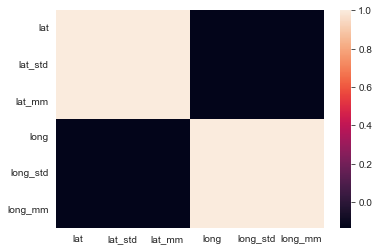

In [34]:
# Графический вид
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Задача 5. Признаки на основе дат

1. Выведите по отдельности колонки `posting_date` и `date`. 

In [73]:
%%time
# Выведем по отдельности колонки posting_date и date
df.posting_date

Wall time: 0 ns


0       2021-04-17T12:30:50-0400
1       2021-05-03T15:40:21-0400
2       2021-04-28T03:52:20-0700
3       2021-04-17T10:08:57-0400
4       2021-04-08T15:10:56-0400
                  ...           
9614    2021-04-10T16:33:57-0400
9615    2021-05-03T09:36:30-0400
9616    2021-04-22T12:14:01-0700
9617    2021-04-14T09:14:42-0500
9618    2021-04-24T13:50:49-0400
Name: posting_date, Length: 9619, dtype: object

In [45]:
df.date

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-04-08 19:10:56+00:00
                  ...            
9614    2021-04-10 20:33:57+00:00
9615    2021-05-03 13:36:30+00:00
9616    2021-04-22 19:14:01+00:00
9617    2021-04-14 14:14:42+00:00
9618    2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: object

2. Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому измените её тип c помощью `pd.to_datetime`.

In [75]:
%%time
# изменим тип переменной date c помощью pd.to_datetime.
df.date = pd.to_datetime(df['date'])
df.date

Wall time: 9 ms


0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-04-08 19:10:56+00:00
                  ...           
9614   2021-04-10 20:33:57+00:00
9615   2021-05-03 13:36:30+00:00
9616   2021-04-22 19:14:01+00:00
9617   2021-04-14 14:14:42+00:00
9618   2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: datetime64[ns, UTC]

3. Несколькими способами извлеките номер месяца продажи автомобиля:

3.1 Из переменной `posting_date` с помощью lambda-функции и операций над строками.

In [76]:
%%time
# Извлекаем номер месяца продажи автомобиля с помощью lambda-функции и операций над строками
df.apply(lambda x: x.posting_date[5:7], axis=1)

Wall time: 920 ms


0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Length: 9619, dtype: object

3.2 Из переменной `date` с помощью с помощью lambda-функции и метода `month`.

In [77]:
%%time
#  Извлекаем номер месяца из переменной date с помощью lambda-функции и метода month
df.apply(lambda x: x.date.month, axis=1)

Wall time: 750 ms


0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Length: 9619, dtype: int64

3.3 Из переменной `date` с помощью с помощью `dt` и метода `month`.

In [78]:
%%time
#  Извлекаем номер месяца из переменной date с помощью dt и метода month
df.date.dt.month

Wall time: 2 ms


0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

4. Создайте любым из способов 3.2 или 3.3 признак `month`, обозначающий номер месяца размещения объявления о продаже автомобиля, и распечатайте его.

In [82]:
%%time
#  Извлекаем номер месяца из переменной date с помощью dt и метода month
df['month'] = df.date.dt.month
print(df.month)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: month, Length: 9619, dtype: int64
Wall time: 2 ms


5. Создайте признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля, и распечатайте его.

In [85]:
%%time
# Получим и сохраним в новую переменную 'dayofweek' день недели размещения объявления о продаже автомобиля
df['dayofweek'] = df.date.dt.dayofweek
print(df.dayofweek)

0       5
1       0
2       2
3       5
4       3
       ..
9614    5
9615    0
9616    3
9617    2
9618    5
Name: dayofweek, Length: 9619, dtype: int64
Wall time: 3 ms


6. Создайте признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.

In [86]:
%%time
# Получим и сохраним в новую переменную 'diff_years' количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля
df['diff_years'] = df.date.dt.year - df.year
print(df.diff_years)

0        1
1        5
2        4
3        8
4        9
        ..
9614    19
9615    13
9616    10
9617     6
9618     4
Name: diff_years, Length: 9619, dtype: int64
Wall time: 4 ms


In [88]:
# проверим
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm,month,dayofweek,diff_years
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-0.510784,0.632075,-0.155788,1.163032,1.910669,0.341769,0.288699,4,5,1
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,-0.402947,-0.646781,-0.155788,0.932087,1.235799,0.468665,0.333055,5,0,5
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-0.514480,0.560744,-0.155788,0.470197,0.560930,0.313561,0.292022,4,2,4
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,0.356215,0.314844,4,5,8
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,-0.333074,0.766366,-0.155788,1.163032,1.910669,0.361810,0.293893,4,3,9


7. Примените стандартизацию к новым признаками и сохраните результат в новые признаки вида `month_std`.

In [89]:
# Создайем объект minMax_scaler класса MinMaxScaler с параметрами по умолчанию
stdScaler = StandardScaler()
# Идентифицируем параметры преобразования
stdScaler.fit(df[['month','dayofweek','diff_years']])
# Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную
stdScaler_data = stdScaler.transform(df[['month','dayofweek','diff_years']])
# Создаем наименования новых признаков по шаблону: month_std для month и запишим в новый список
columns_dat_std = [x + '_std' for x in ['month','dayofweek','diff_years']]
# Добавим в исходный датафрейм получившиеся новые признаки
df[columns_dat_std] = stdScaler_data
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,model_len_std,model_word_count_std,lat_mm,long_mm,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.163032,1.910669,0.341769,0.288699,4,5,1,-0.615846,1.120284,-1.322394
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.932087,1.235799,0.468665,0.333055,5,0,5,1.623784,-1.374972,-0.695973
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.470197,0.560930,0.313561,0.292022,4,2,4,-0.615846,-0.376870,-0.852578
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.915473,-0.788810,0.356215,0.314844,4,5,8,-0.615846,1.120284,-0.226157
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,1.163032,1.910669,0.361810,0.293893,4,3,9,-0.615846,0.122182,-0.069552


### Задача 6. Сохранение датафрейма для этапа моделирования

1. Удалите колонки, которые были исходными для формирования признаков, а также новые признаки, которые были добавлены с целью обучения.  Сохраните новый датафрейм в переменную `df_prepared`.

In [93]:
# Допишите код

columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model',
                    'desc_len', 'model_in_desc', 'price_k$', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date', 'std_scaled_price',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']
#Создадим новый dataframe очищенный от исходных переменных
df_prepared = df.drop(columns_for_drop,axis=1)
df_prepared.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,...,lat_std,long_std,year_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,0,0,0,...,-0.619172,0.484245,1.322394,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0,0,0,...,0.388014,1.110800,0.695973,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0,0,0,...,-0.843059,0.531185,0.852578,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0,0,0,...,-0.504509,0.853562,0.226157,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0,0,0,...,-0.460101,0.557607,0.069552,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


2. Распечатайте оставшийся список колонок и размерность финального датафрейма.

In [109]:
# список колонок и размерность финального датафрейма
print("Список колонок: ", list(df_prepared.columns))


Список колонок:  ['id', 'price', 'price_category', 'is_audi', 'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep', 'is_honda', 'is_nissan', 'x0_diesel', 'x0_electric', 'x0_gas', 'x0_hybrid', 'x0_other', 'std_scaled_odometer', 'x0_-benz', 'x0_1', 'x0_124', 'x0_128i', 'x0_135i', 'x0_1500', 'x0_163869', 'x0_1928', 'x0_1951', 'x0_1954', 'x0_1960s', 'x0_1966', 'x0_1968', 'x0_1972', 'x0_1977', 'x0_1978', 'x0_198.5', 'x0_1988', 'x0_1994', 'x0_1999', 'x0_2', 'x0_200', 'x0_2000', 'x0_2002', 'x0_2006', 'x0_2007', 'x0_2008', 'x0_2009', 'x0_2012', 'x0_2015', 'x0_2016', 'x0_2017', 'x0_2018', 'x0_210', 'x0_240', 'x0_2500', 'x0_2500hd', 'x0_280zx', 'x0_3', 'x0_3-series', 'x0_3-window', 'x0_3.2', 'x0_300', 'x0_300-series', 'x0_300c', 'x0_300s', 'x0_300zx', 'x0_3100', 'x0_318i', 'x0_320i', 'x0_323i', 'x0_325ci', 'x0_325i', 'x0_325is', 'x0_325xi', 'x0_328', 'x0_328ci', 'x0_328d', 'x0_328i', 'x0_328xi', 'x0_330i', 'x0_330xi', 'x0_335i', 'x0_335xi', 'x0_350', 'x0_3500', 'x0_3500hd', 'x0_350z', 'x0_370z', 'x

In [110]:
print("Размерность финального датафрейма: ", df_prepared.shape)

Размерность финального датафрейма:  (9619, 1426)


3. Запишите перобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.

In [112]:
# Сохраним перобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.
df_prepared.to_csv('data/vehicles_dataset_prepared.csv', index=False)

## Описание преобразованного датасета:
- `id`: идентификатор записи;
- `is_manufacturer_name`: признак производителя автомобиля;

- `region_*`: регион;
- `x0_*`: тип топлива;
- `manufacturer_*`: производитель;
- `short_model_*`: сокращённая модель автомобиля;
- `title_status_*`: статус;
- `transmission_*`: коробка передач;
- `state_*`: штат;
- `age_category_*`: возрастная категория автомобиля;

- `std_scaled_odometer`: количество пройденных миль (после стандартизации);
- `year_std`: год выпуска (после стандартизации);
- `lat_std`: широта (после стандартизации);
- `long_std`: долгота (после стандартизации);
- `odometer/price_std`: отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`: количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`: количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`: длина наименования автомобиля (после стандартизации);
- `model_word_count_std`: количество слов в наименовании автомобиля (после стандартизации);
- `month_std`: номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`: день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`: количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`: стоимость;
- `price_category`: категория цены.